In [13]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [14]:
# Helper functions
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    print(corr_matrix)
    corr = corr_matrix[0, 1]
    print("R", corr, "R^2", corr ** 2)
    return corr ** 2

def avg_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

X_train shape (80, 1)
y_train shape (80,)
[ 35.22021771 -32.72160341   3.03278631  60.25172385  60.11274479]


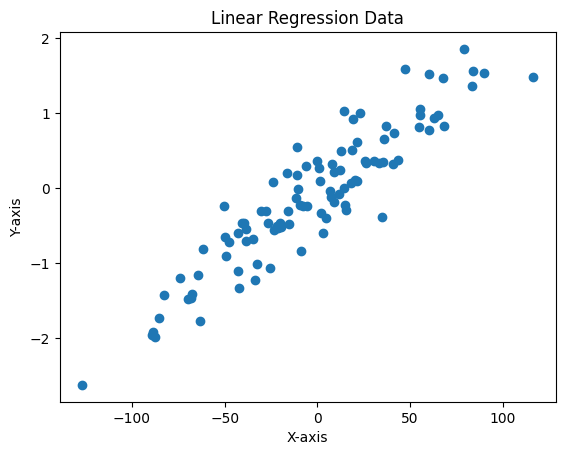

In [15]:
# Data preparation
X, y = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print(y_train[:5])

plt.title('Linear Regression Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.scatter(y, X[:,0])
plt.show()

In [18]:
class LinearRegression:
    def _grad_desc(self, X, y):
        samples_size = X.size
        for _ in range(self.iters):
            # make prediction
            y_pred = np.dot(X, self.w) + self.w_0
            # compute squared loss
            loss = (y_pred - y)
            # calculate gradients
            dw = (1 / samples_size) * np.dot(X.T, loss)
            db = (1 / samples_size) * np.sum(loss)

            # update weights and bias according to gradients
            self.w -= self.lr * dw
            self.w_0 -= self.lr * db

    def __init__(self, lr=0.001, iters=1000):
        self.lr = lr
        self.iters = iters
        self.w = None
        self.w_0 = None
    
    def fit(self, X, y):
        _, features_size = X.shape
        self.w = np.random.random(features_size)
        self.w_0 = 0
        self._grad_desc(X, y)
    
    def predict(self, X):
        return np.dot(X, self.w) + self.w_0


[[1.         0.92415336]
 [0.92415336 1.        ]]
R 0.9241533583807543 R^2 0.8540594298064269
MSE: 416.80890612748124 acc: 0.8540594298064269


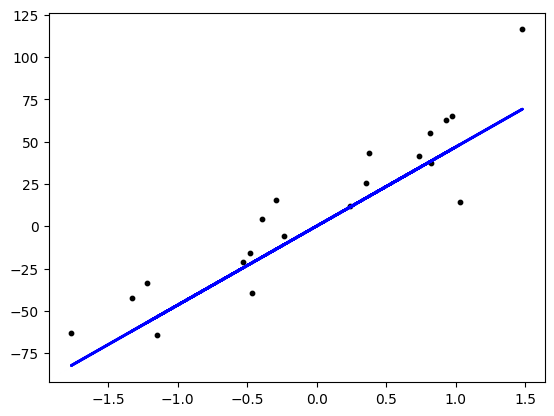

In [19]:
# regressor
regressor = LinearRegression(lr=0.05)

# fit model and make prediction
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
error = avg_squared_error(y_test, y_pred)
acc = r2_score(y_test, y_pred)

print("MSE:", error,"acc:", acc)
plt.scatter(X_test, y_test, color='black', s=10)
plt.plot(X_test, y_pred, color="blue", linewidth=2, label="prediction")
plt.show()